# import

In [1]:
# data handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import re
import json
from urllib.parse import quote

# crawling
import requests
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup

# time control
from time import sleep
from datetime import datetime, date, timedelta

# NLP
import re
import ckonlpy
from ckonlpy.tag import Twitter
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
import openai

# NLP Visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from wordcloud import WordCloud
import cv2


# customized functions
from news_utils import *
from news_crawling import *
from news_utils import *
from news_words import *
from news_summarize import *

# utils
from tqdm import tqdm
import os

import warnings # FutureWarning 안보이게
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# 다음 뉴스 크롤링

In [2]:
prepared_urls = get_urls_daum(hidden_window=False)

df_daum = pd.DataFrame({'URL':prepared_urls, '신문사':np.nan, '기자명':np.nan, '제목':np.nan, '본문':np.nan,
                   '날짜':np.nan, '연':np.nan, '월':np.nan, '일':np.nan, '요일':np.nan})

df_daum = news_crawler_daum(df_daum)
display(df_daum.head(3))
display(df_daum.tail(3))

An exception occurred: Message: 



100%|██████████| 1713/1713 [20:19<00:00,  1.40it/s]


,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
0,https://v.daum.net/v/20230704230603511,IT동아,김영우,"[IT애정남] 취미용 영상 편집 위한 노트북, 골라주세요","[IT동아 김영우 기자] IT 전반에 관한 의문, 혹은 제품 및 서비스의 선택에 고...",2023-07-04,2023,7,4,1
1,https://v.daum.net/v/20230704223246303,게임톡,홍수민,"금강선 복귀 ""솔직한 소통으로 민심 되돌렸다""","로스트아크 긴급 방송, 최근 불거진 이슈 설명하고 향후 방향 제시\n- 금강선 스마...",2023-07-04,2023,7,4,1
2,https://v.daum.net/v/20230704222009179,연합뉴스,김주환,"'로스트아크' 금강선 CCO ""중국 현지화, 국내 영향 없게 할 것""","'중국 검열판 적용' 논란에 사과…""당분간 CCO직 내려놓고 디렉터로서 소통""\n라...",2023-07-04,2023,7,4,1


,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
1710,https://v.daum.net/v/20230705000345007,중앙일보,입력,[사진] 스타트업이 만든 자율비행체,스타트업이 만든 자율비행체\n국내 스타트업인 디스이즈엔지니어링(TIE)의 홍유정 대...,2023-07-05,2023,7,5,2
1711,https://v.daum.net/v/20230705000335999,중앙일보,입력,"[Biz & Now] KT, 새 대표 후보자 12일까지 모집…‘공모+추천’ 투트랙",KT가 오는 12일까지 차기 대표이사 후보자를 공개 모집한다. KT는 지난 3일 사...,2023-07-05,2023,7,5,2
1712,https://v.daum.net/v/20230705000021920,더팩트,최문정,"""바닥 찍고 반등 시작""…메모리 업황 개선에 삼성·SK 웃을까","반도체 '실적 풍향계' 마이크론, 시장 예상치 웃돈 실적 발표\n6월 D램 가격 하...",2023-07-05,2023,7,5,2


# 네이버 뉴스 크롤링

In [3]:
# 네이버 IT뉴스 게시판에서 근 24시간에 해당하는 페이지 범위 설정
pages = page_lists(endpage=20)

# get_urls함수에 게시판 링크를 입력해 각 뉴스의 URL 저장
prepared_urls = get_urls_naver(pages=pages, hidden_window=True, verbose=False)

# 기사를 담을 데이터프레임 생성

df_naver = pd.DataFrame({'URL':prepared_urls, '신문사':np.nan, '기자명':np.nan, '제목':np.nan, '본문':np.nan,
                   '날짜':np.nan, '연':np.nan, '월':np.nan, '일':np.nan, '요일':np.nan})

# 각 네이버 기사에서 필요한 정보 스크래핑하여 데이터프레임에 적재
df_naver = news_crawler_naver(df_naver)
display(df_naver.head(3))
display(df_naver.tail(3))

중복 제거 전 URL 수 : 414
중복 제거 후 URL 수 : 414


100%|██████████| 414/414 [06:23<00:00,  1.08it/s]


,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
0,https://n.news.naver.com/mnews/article/001/001...,연합뉴스,조성미,"KT-과기정통부, 'AI 대학원 챌린지'로 실무형 AI 인재 발굴",(서울=연합뉴스) 조성미 기자 = KT는 과학기술정보통신부와 인공지능(AI) 개발 ...,2023-07-05,2023,7,5,2
1,https://n.news.naver.com/mnews/article/030/000...,전자신문,김명희,"뤼이드, 브라질 공교육에 AI 교육 솔루션 공급 MOU 체결",브라질 파라나주 주정부청사에서 진행된 뤼이드와 셀레파의 업무협약(MOU) 체결 사진...,2023-07-05,2023,7,5,2
2,https://n.news.naver.com/mnews/article/030/000...,전자신문,김지선,"공공 앱·웹사이트, 사용자인 국민이 직접 평가한다",국민이 공공 애플리케이션(앱)과 웹사이트를 평가하는 '국민평가제'가 시행된다.\n\...,2023-07-05,2023,7,5,2


,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
229,https://n.news.naver.com/mnews/article/031/000...,아이뉴스24,정종오,"[의사과학자 길 걷다] UNIST-울산대의대 ""제대로 키워보겠다""","UNIST·울산대 의대, 학사과정생부터 전주기적 커리큘럼 만들어\n의사과학자 육성에...",2023-07-04,2023,7,4,1
230,https://n.news.naver.com/mnews/article/001/001...,연합뉴스,김용태,"UNIST·울산대 의대, 의과학자 양성 공동 교육과정 확정",UNIST에 의과학 AI 등 7개 과목 개설…9월부터 수강 시작\n\n\nUNIST...,2023-07-04,2023,7,4,1
231,https://n.news.naver.com/mnews/article/014/000...,파이낸셜뉴스,구자윤,"""아, 진작 할 걸.. "" 알뜰폰 0원 요금제 사실상 끝",알뜰폰 정보 제공 사이트 '알뜰폰허브'에서 0원 요금제로 검색한 결과 과거처럼 3M...,2023-07-04,2023,7,4,1


# 네이버 뉴스와 다음 뉴스를 Merge 데이터프레임 만들기

In [4]:
df = pd.concat([df_naver, df_daum], axis=0)
df = df.reset_index(drop=True)
df

,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
0,https://n.news.naver.com/mnews/article/001/001...,연합뉴스,조성미,"KT-과기정통부, 'AI 대학원 챌린지'로 실무형 AI 인재 발굴",(서울=연합뉴스) 조성미 기자 = KT는 과학기술정보통신부와 인공지능(AI) 개발 ...,2023-07-05,2023,7,5,2
1,https://n.news.naver.com/mnews/article/030/000...,전자신문,김명희,"뤼이드, 브라질 공교육에 AI 교육 솔루션 공급 MOU 체결",브라질 파라나주 주정부청사에서 진행된 뤼이드와 셀레파의 업무협약(MOU) 체결 사진...,2023-07-05,2023,7,5,2
2,https://n.news.naver.com/mnews/article/030/000...,전자신문,김지선,"공공 앱·웹사이트, 사용자인 국민이 직접 평가한다",국민이 공공 애플리케이션(앱)과 웹사이트를 평가하는 '국민평가제'가 시행된다.\n\...,2023-07-05,2023,7,5,2
3,https://n.news.naver.com/mnews/article/138/000...,디지털데일리,이나연,"네이버D2SF, 데이터 생성·비식별화 스타트업 ‘큐빅’ 신규 투자",[ⓒ 네이버D2SF]\n\n\n[디지털데일리 이나연 기자] 데이터에 노이즈를 주입해...,2023-07-05,2023,7,5,2
4,https://n.news.naver.com/mnews/article/001/001...,연합뉴스,조성미,"정부 ""기업 AI 윤리 확보 위해 가이드라인 제시·검증체계 지원""",제2차 인공지능 윤리정책 포럼…신뢰성 담보 AI 활용 촉진 논의\n\n\n(서울=연...,2023-07-05,2023,7,5,2
...,...,...,...,...,...,...,...,...,...,...
1185,https://v.daum.net/v/20230705002504227,쿠키뉴스,차종관,"금강선, ‘로스트아크’ 디렉터로 임시 복귀…“중국 현지화, 국내 악영향 없도록”",금강선 전 디렉터가 ‘운명의 빛’ 트레일러의 ‘붉은 달’ 일러스트 관련 의혹을 해명...,2023-07-05,2023,7,5,2
1186,https://v.daum.net/v/20230705000622123,강원도민일보,김덕형,“전기요금 차등제 추진 동해안 기업유치 기회”,강원연구원 기업천국 세미나\n▲ 강원연구원은 4일 연구원 민주홀에서 현진권 원장 주...,2023-07-05,2023,7,5,2
1187,https://v.daum.net/v/20230705000345007,중앙일보,입력,[사진] 스타트업이 만든 자율비행체,스타트업이 만든 자율비행체\n국내 스타트업인 디스이즈엔지니어링(TIE)의 홍유정 대...,2023-07-05,2023,7,5,2
1188,https://v.daum.net/v/20230705000335999,중앙일보,입력,"[Biz & Now] KT, 새 대표 후보자 12일까지 모집…‘공모+추천’ 투트랙",KT가 오는 12일까지 차기 대표이사 후보자를 공개 모집한다. KT는 지난 3일 사...,2023-07-05,2023,7,5,2


# 텍스트 전처리

In [5]:
# raw text와 processed text를 비교하기 위해 copy
df_preprocess = df.copy()
df_preprocess['본문'] = df_preprocess['본문'].str.upper() # 전부 대문자로 변경

# twitter 객체에 Noun 단어 adding
twitter = Twitter()

# 사용자 정의 명사 지정 리스트 받기
add_words = get_addwords()
# 불용어 리스트 받기
stop_words = get_stopwords()

for noun in add_words:
    twitter.add_dictionary(noun, 'Noun')

# re와 ckonlpy로 전처리
articles = df_preprocess['본문']

# 본문 Seriese객체에서 index 받아오기
# 기사의 건수(약 1400건)만큼 iter
for idx in tqdm(range(len(articles))): 
    # re로 기본적인 전처리
    text = articles[idx]
    to_remove = '[\n,@\'()‘“”’%./■△\"·]+'
    text = re.sub(to_remove, '', text)
    
    # ckonlpy로 ' '로 구분된 string형태의 corpus 생성
    contents =''
    for temp_word in twitter.nouns(text):
        # 한글자와 불용어 제외
        if (len(temp_word) > 1)&(temp_word not in stop_words):
            contents = contents + ' ' + temp_word
    
    # 전처리를 거친 corpus를 df_preprocess의 본문에 저장
    df_preprocess.loc[idx, '본문'] = contents.strip()

# 중복 제거
df_preprocess = df_preprocess.drop_duplicates(subset=['본문'])
    
######################################## Check result
sleep(2)
print("전처리 전 :")
print("*"*50)
display(df.head(3))
display(df.tail(3))
print('\n\n')
print("전처리 후 :")
print("*"*50)
display(df_preprocess.head(3))
display(df_preprocess.tail(3))
########################################

C:\Users\kyooo\anaconda3\envs\final\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
100%|██████████| 1190/1190 [00:36<00:00, 32.84it/s]


전처리 전 :
**************************************************


,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
0,https://n.news.naver.com/mnews/article/001/001...,연합뉴스,조성미,"KT-과기정통부, 'AI 대학원 챌린지'로 실무형 AI 인재 발굴",(서울=연합뉴스) 조성미 기자 = KT는 과학기술정보통신부와 인공지능(AI) 개발 ...,2023-07-05,2023,7,5,2
1,https://n.news.naver.com/mnews/article/030/000...,전자신문,김명희,"뤼이드, 브라질 공교육에 AI 교육 솔루션 공급 MOU 체결",브라질 파라나주 주정부청사에서 진행된 뤼이드와 셀레파의 업무협약(MOU) 체결 사진...,2023-07-05,2023,7,5,2
2,https://n.news.naver.com/mnews/article/030/000...,전자신문,김지선,"공공 앱·웹사이트, 사용자인 국민이 직접 평가한다",국민이 공공 애플리케이션(앱)과 웹사이트를 평가하는 '국민평가제'가 시행된다.\n\...,2023-07-05,2023,7,5,2


,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
1187,https://v.daum.net/v/20230705000345007,중앙일보,입력,[사진] 스타트업이 만든 자율비행체,스타트업이 만든 자율비행체\n국내 스타트업인 디스이즈엔지니어링(TIE)의 홍유정 대...,2023-07-05,2023,7,5,2
1188,https://v.daum.net/v/20230705000335999,중앙일보,입력,"[Biz & Now] KT, 새 대표 후보자 12일까지 모집…‘공모+추천’ 투트랙",KT가 오는 12일까지 차기 대표이사 후보자를 공개 모집한다. KT는 지난 3일 사...,2023-07-05,2023,7,5,2
1189,https://v.daum.net/v/20230705000021920,더팩트,최문정,"""바닥 찍고 반등 시작""…메모리 업황 개선에 삼성·SK 웃을까","반도체 '실적 풍향계' 마이크론, 시장 예상치 웃돈 실적 발표\n6월 D램 가격 하...",2023-07-05,2023,7,5,2





전처리 후 :
**************************************************


,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
0,https://n.news.naver.com/mnews/article/001/001...,연합뉴스,조성미,"KT-과기정통부, 'AI 대학원 챌린지'로 실무형 AI 인재 발굴",서울 연합뉴스 조성미 KT 과학기술정보통신부 인공지능 AI 개발 대회 AI 대학원 ...,2023-07-05,2023,7,5,2
1,https://n.news.naver.com/mnews/article/030/000...,전자신문,김명희,"뤼이드, 브라질 공교육에 AI 교육 솔루션 공급 MOU 체결",브라질 파라나 정부 청사 진행 이드 셀레 파의 업무 협약 MOU 체결 왼쪽 이드 준...,2023-07-05,2023,7,5,2
2,https://n.news.naver.com/mnews/article/030/000...,전자신문,김지선,"공공 앱·웹사이트, 사용자인 국민이 직접 평가한다",국민 공공 애플리케이션 웹사이트 평가 국민 평가 시행 행정안전부 디지털 플랫폼 정부...,2023-07-05,2023,7,5,2


,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
1187,https://v.daum.net/v/20230705000345007,중앙일보,입력,[사진] 스타트업이 만든 자율비행체,스타트업 자율 비행 국내 스타트업 디스 이즈 엔지니어링 홍유 기자간담회 고속 자율 ...,2023-07-05,2023,7,5,2
1188,https://v.daum.net/v/20230705000335999,중앙일보,입력,"[Biz & Now] KT, 새 대표 후보자 12일까지 모집…‘공모+추천’ 투트랙",KT 차기 대표이사 후보자 공개 모집 KT 사외이사 전원 구성 이사 후보 추천 위원...,2023-07-05,2023,7,5,2
1189,https://v.daum.net/v/20230705000021920,더팩트,최문정,"""바닥 찍고 반등 시작""…메모리 업황 개선에 삼성·SK 웃을까",반도체 실적 풍향계 마이크론 예상 웃돈 실적 발표 가격 하락 낸드 플래시 정세 지난...,2023-07-05,2023,7,5,2


# 토픽 모델링 및 Topic Num 최적화

In [6]:
# 리스트 내 리스트 형태로 저장
preprocessed_articles = [article.split(' ') for article in articles]

In [7]:
# corpora.Dictionary
dictionary = corpora.Dictionary(preprocessed_articles)
dictionary.filter_extremes(no_below=10, no_above=0.8)

corpus = [dictionary.doc2bow(article) for article in preprocessed_articles]
texts = [preprocessed_articles[idx] for idx in range(len(corpus))]

In [8]:
PARAM = {
    'RANGES':15,
    'PASSES':50,
    'ITER':100,
    'COHERENCE_METRIC':'c_v',
}

In [9]:
# 3개부터 최대 15개까지의 토픽 수를 비교하며 정합도 점수 기록
news_coherence_scores = []

for i in tqdm(range(3, PARAM['RANGES']+1), desc="Operating All Topic Ranges"):
    model = LdaModel(corpus=corpus, num_topics=i, id2word=dictionary, passes=PARAM['PASSES'],
                     iterations=PARAM['ITER'])
    coherence_model = CoherenceModel(model=model, texts=texts, corpus=corpus, dictionary=dictionary, coherence=PARAM['COHERENCE_METRIC'])
    coherence_lda = coherence_model.get_coherence()
    news_coherence_scores.append(coherence_lda)

Operating All Topic Ranges: 100%|██████████| 13/13 [16:05<00:00, 74.23s/it]


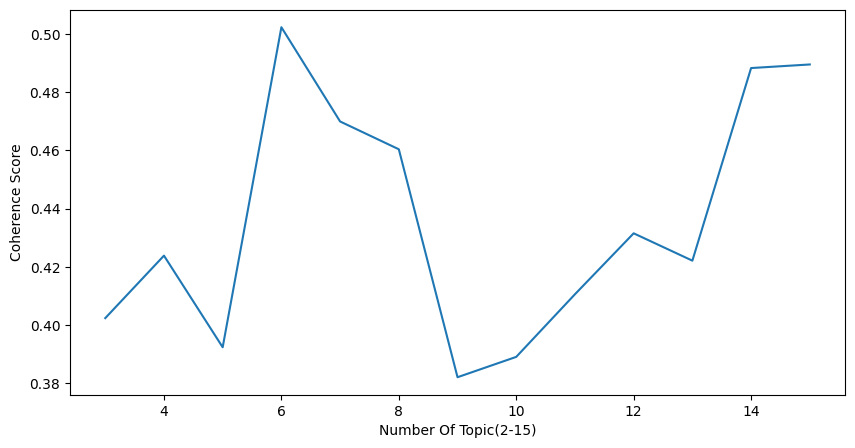

In [10]:
k = [i for i in range(3, PARAM['RANGES']+1)]
x = np.array(k)
y = np.array(news_coherence_scores)
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xlabel("Number Of Topic(2-"+str(PARAM['RANGES'])+")")
plt.ylabel('Coherence Score')
plt.show()

# Topic Num이 최적화된 모델

In [11]:
find_best = np.array([news_coherence_scores])
Best_Num_Of_Topic = int(np.where(y==find_best.max())[0][0]+3)
print("최적의 토픽 수 :", Best_Num_Of_Topic)
print("정합도 점수 :", round(find_best.max(), 4))

최적의 토픽 수 : 6
정합도 점수 : 0.5023


In [13]:
num_topics = Best_Num_Of_Topic
lda_model = LdaModel(corpus, num_topics, dictionary, passes=PARAM['PASSES'], iterations=PARAM['ITER'])#, alpha=PARAM['ALPHA'], eta=PARAM['ETA'])

In [14]:
# LDA 시각화
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary)
pyLDAvis.display(p)

# 각 토픽에 정합하는 기사 추출

In [15]:
# 각 문서에 대한 주제 분포 가져오기
document_topics = [lda_model.get_document_topics(doc) for doc in corpus]
# document_topics # 1382개

main_topic_list = []

for article_idx, article in enumerate(document_topics):
    max_score = 1e-8
    max_topic_num = -1e-8
    
    # 한 기사안에서 토픽 : 점수
    for topicnum, score in article:
        if score > max_score:
            max_score = score
            max_topic_num = topicnum
    #main_topic_list.append((str(max_topic_num+1)+'번토픽', max_score))
    main_topic_list.append((int(max_topic_num)+1, max_score))

main_topic_list

[(1, 0.66748524),
 (2, 0.9935789),
 (4, 0.99522585),
 (2, 0.9944873),
 (6, 0.5068793),
 (6, 0.60147405),
 (3, 0.9986519),
 (2, 0.99322176),
 (3, 0.9973739),
 (5, 0.783135),
 (4, 0.99752915),
 (4, 0.6830685),
 (1, 0.9950449),
 (5, 0.91882926),
 (5, 0.6108704),
 (5, 0.99396694),
 (3, 0.99702436),
 (2, 0.99609876),
 (2, 0.8020321),
 (5, 0.996183),
 (6, 0.38591596),
 (5, 0.992882),
 (3, 0.9987724),
 (2, 0.85937953),
 (3, 0.80945116),
 (5, 0.99555546),
 (6, 0.9898697),
 (5, 0.9985017),
 (5, 0.7850354),
 (5, 0.56859004),
 (3, 0.5598647),
 (3, 0.998667),
 (5, 0.37739143),
 (5, 0.95302284),
 (3, 0.3752344),
 (2, 0.53815717),
 (6, 0.91232026),
 (5, 0.9918544),
 (1, 0.8107784),
 (2, 0.65697134),
 (1, 0.63184154),
 (4, 0.9959579),
 (3, 0.9224122),
 (5, 0.8133416),
 (4, 0.75419396),
 (3, 0.9975715),
 (2, 0.82623714),
 (3, 0.99756527),
 (1, 0.5792753),
 (2, 0.9974793),
 (2, 0.98292255),
 (2, 0.5805877),
 (2, 0.97034454),
 (3, 0.9972497),
 (5, 0.9951895),
 (6, 0.48079365),
 (2, 0.866163),
 (2, 0.521

In [16]:
# 토픽과 점수 추가하여 df_merged로 합치기
df_score = pd.DataFrame(main_topic_list, columns=['토픽', '점수'])
df_merged = pd.concat([df_preprocess, df_score], axis=1)

In [17]:
# 높은 점수 순서대로 정렬한 후, 토픽으로 group을 생성한 후, 상위 5개씩 추출
df_merged = df_merged.drop_duplicates(subset=['제목'])
df_merged = df_merged.sort_values('점수', ascending=False)
df_result = df_merged.groupby('토픽').head(5)
df_result = df_result.sort_values('토픽', ignore_index=True)
df_result['토픽'] = df_result['토픽'].astype(int)
df_result = df_result[['URL', '토픽', '점수', '제목', '본문']]
# 최대 행 제한 해제
pd.set_option('display.max_rows', None)
# 최대 열 제한 해제
pd.set_option('display.max_columns', None)

df_result

,URL,토픽,점수,제목,본문
0,https://v.daum.net/v/20230705112334243,1,0.996366,"KT스카이라이프, 'TV·모바일' 가족결합 20% 할인 상품 출시",TV 모바일 회선 결합 최대 TV 할인 스카이라이프 모든 모바일 요금 결합 할인 혜...
1,https://n.news.naver.com/mnews/article/003/001...,1,0.997196,"""무채색은 질려서?""…아이폰15·갤플립5 모두 원색에 꽂혔다",아이폰 그니 크림슨 블루 그린 핑크 적용 플립 최대 크림 코랄 다이아몬드 기대 아이...
2,https://n.news.naver.com/mnews/article/005/000...,1,0.997363,"생성형 AI, 광고 시장에 침투하다… “제작비 1/4로 줄어”",LG 유플러스 성형 AI 활용 영상 광고 론칭했다 영상 광고 성형 AI 아기 돼지 ...
3,https://n.news.naver.com/mnews/article/014/000...,1,0.996587,"KT스카이라이프, ‘20% 더블할인 가족결합’ 출시",KT 스카이라이프 가족 결합 대상 확대 요금 최대 할인 더블 할인 가족 결합 출시 ...
4,https://n.news.naver.com/mnews/article/029/000...,1,0.997676,[김나인의 `樂樂한 콘텐츠`] 100만명이 사랑한 AI 친구… 옷 골라주고 음악도 ...,챗GPT 활용 사용자 맞춤 대화 프렌즈 말투 성격 달라 재미 쏠쏠 출시 개월 가입자...
5,https://n.news.naver.com/mnews/article/028/000...,2,0.997195,"생성형 인공지능, 46일 만에 신약 설계…사상 첫 임상 2상 진입",리코 발성 섬유화 치료 제비 시간 단축 인공지능 설계 신약 후보 사상 음으로 시험 ...
6,https://n.news.naver.com/mnews/article/015/000...,2,0.997479,"""AI로 내 사진 못 가져가""… 네이버가 찜한 스타트업 '큐빅' [허란의 VC 투자노트]",이화여대 창업 스타트업 차등 정보보호 자체 개발 민감 정보 노출 위험 개인 합성 변...
7,https://n.news.naver.com/mnews/article/018/000...,2,0.997624,김용삼 진코어 대표 “세계 최고 수준 초소형 유전자가위 기술로 승부”,코어 초소 유전자 가위 수출 성공 일부 질환 교정 전달 크리스 캐스 상회 추가 수출...
8,https://v.daum.net/v/20230705104503023,2,0.997881,"SK바이오사이언스, 태국과 백신 개발·생산 인프라 구축 협력",독감 백신 스카이 플루 완제 생산 이전 향후 중동 동남아 국가 사업 확장 예정 부족...
9,https://n.news.naver.com/mnews/article/018/000...,2,0.997771,[Bio다크호스-진코어편]②“초소형 유전자 가위 가치 상승여력 충분”,진화 세대 유전자 가위 플랫폼 AR 확보 크기 교정 성공 오프 타깃 마리 토끼 AR...


# 확인한 결과에서, 메일에 사용할 기사만 추출

In [18]:
select_topic = input('사용할 토픽을 입력하세요')
select_topic = select_topic.split(' ')

naming = input('순서대로 토픽의 키워드를 명명하세요.')
naming = naming.split(' ')

cond1 = (df_result['토픽']==int(select_topic[0]))
cond2 = (df_result['토픽']==int(select_topic[1]))
cond3 = (df_result['토픽']==int(select_topic[2]))

df_result = df_result[cond1|cond2|cond3]

topic_num, topic_keywords = [int(select_topic[0]), int(select_topic[1]), int(select_topic[2])], [naming[0], naming[1], naming[2]]
df_result.loc[df_result['토픽'].isin(topic_num), '토픽'] = df_result['토픽'].map(dict(zip(topic_num, topic_keywords)))
df_result

사용할 토픽을 입력하세요3 4 6
순서대로 토픽의 키워드를 명명하세요.KBS IAEA 우주산업


,URL,토픽,점수,제목,본문
10,https://n.news.naver.com/mnews/article/138/000...,KBS,0.997683,野 안정상 “총선 대비 포털 장악” 비판…포털규제 법적근거는?,김효재 방송통신 위원장 직무 대행 지난달 정부 과천 청사 방송통신 위원회 전체 회의...
11,https://n.news.naver.com/mnews/article/003/001...,KBS,0.998772,"방통위, 수신료 분리징수 의결…졸속처리 vs KBS 방만경영 결과(종합)",방통위 방송 시행 개정안 의결 수신료 납부 의무 여전 국회 공영 방송 이기 후속 조...
12,https://n.news.naver.com/mnews/article/629/000...,KBS,0.998667,"방통위, 30년 만에 TV수신료·전기요금 분리…언론단체 ""군사작전 같은 '묻지마 개정'""",방통위 방송 시행 일부 개정 명령 사항 의결 입법 예고 기간 고작 열흘 언론 반발 ...
13,https://n.news.naver.com/mnews/article/003/001...,KBS,0.998136,"로스트아크 '中 검열' 해명 나선 금강선 ""고의 아냐…재발방지 약속""",중국 검열 적용 논란 패치 실수 몬스터 현지 이슈 현지 인력 확충 재발 방지 금강 ...
14,https://n.news.naver.com/mnews/article/092/000...,KBS,0.998652,전기요금 고지서에 KBS·EBS 수신료 빠진다...후폭풍 불가피,방통위 시행 개정안 의결 정치 갈등 현장 혼란 가시 화지 부터 전기요금 통합 징수 ...
15,https://n.news.naver.com/mnews/article/023/000...,IAEA,0.997889,한국 바다에 삼중수소?… IAEA “日 방류 3㎞ 지나면 영향 없어”,오염수 방류 국제 원자력 기구 최종 보고서 내면 후쿠시마 오염수 방류 현실 다가 전...
16,https://n.news.naver.com/mnews/article/008/000...,IAEA,0.997529,"'삼중수소' 못 거르는 설비…IAEA ""방류 안전"" 결론 내린 까닭",오염수 배출 기준 초과 핵종 제거 설비 SK 탱크 정화 안전성 문제 어도 해양 방류...
17,https://n.news.naver.com/mnews/article/008/000...,IAEA,0.997508,"후쿠시마 오염수 방류 '초읽기'…""韓영향 미미"" 과학계 주장 근거",국제 원자력 기구 해양 방류 계획 점검 최종 보고서 발표 임박 오염수 방류 국내 해...
18,https://n.news.naver.com/mnews/article/009/000...,IAEA,0.998334,“日 세슘우럭 먹게될거야” “연안 어류가 1000km 오는건 불가능”,후쿠시마 오염수 괴담 팩트 체크 삼중수소 위험성 배출 기준 방류 과정 지속 감시 중...
19,https://n.news.naver.com/mnews/article/023/000...,IAEA,0.997688,후쿠시마 방류 30년간 지속적 모니터링 계획,오염수 농도 실시간 공유 총리 최종 보고서 전달 라파엘 로시 왼쪽 국제 원자력 기구...


# 메일링 형식으로 데이터프레임 가공 (+ 기사요약)

In [19]:
# Inner Join으로 본문 컬럼 다시 가져와 추가
df_final = pd.merge(df_result, df[['URL', '본문']], on='URL', how='inner')

# 컬럼명 재설정
df_final = df_final.rename(columns={'본문_x':'본문', '본문_y':'원본', 'URL':'link', '제목':'title', '토픽':'topic'})
df_final = df_final.rename(columns={'본문':'wc'})

# 빈 요약 컬럼 추가
df_final['desc'] = np.nan

# 가독성을 위해 순서 변경
df_final = df_final[['topic', 'link', 'wc', 'desc', '원본', 'title']]

# 네이버 클로바를 이용한 요약 추가
df_final['desc'] = df_final['원본'].apply(temp_summarize_text)

# 본문 요약에 사용한 원본 컬럼 삭제
df_final = df_final.drop(columns=['원본'])

df_final

,topic,link,wc,desc,title
0,KBS,https://n.news.naver.com/mnews/article/138/000...,김효재 방송통신 위원장 직무 대행 지난달 정부 과천 청사 방송통신 위원회 전체 회의...,안 수석전문위원은 여당과 보수언론이 근거도 없이 네이버를 부당하게 공격하고 비판하자...,野 안정상 “총선 대비 포털 장악” 비판…포털규제 법적근거는?
1,KBS,https://n.news.naver.com/mnews/article/003/001...,방통위 방송 시행 개정안 의결 수신료 납부 의무 여전 국회 공영 방송 이기 후속 조...,방송통신위원회가 5일 전체회의에서 KBS 수신료 분리징수를 위한 방송법 시행령 개정...,"방통위, 수신료 분리징수 의결…졸속처리 vs KBS 방만경영 결과(종합)"
2,KBS,https://n.news.naver.com/mnews/article/629/000...,방통위 방송 시행 일부 개정 명령 사항 의결 입법 예고 기간 고작 열흘 언론 반발 ...,KBS·언론계 반발이르면 이달 중순부터 시행방송통신위원회가 5일 정부 과천청사에서 ...,"방통위, 30년 만에 TV수신료·전기요금 분리…언론단체 ""군사작전 같은 '묻지마 개정'"""
3,KBS,https://n.news.naver.com/mnews/article/003/001...,중국 검열 적용 논란 패치 실수 몬스터 현지 이슈 현지 인력 확충 재발 방지 금강 ...,"금강선, 총괄디렉터 임시복귀해 소통 집중금강선 스마일게이트RPG 본부장은 4일 밤 ...","로스트아크 '中 검열' 해명 나선 금강선 ""고의 아냐…재발방지 약속"""
4,KBS,https://n.news.naver.com/mnews/article/092/000...,방통위 시행 개정안 의결 정치 갈등 현장 혼란 가시 화지 부터 전기요금 통합 징수 ...,5일 방통위는 전체회의를 열고 TV수신료를 징수 수탁 사업자의 고유 업무와 결합해 ...,전기요금 고지서에 KBS·EBS 수신료 빠진다...후폭풍 불가피
5,IAEA,https://n.news.naver.com/mnews/article/023/000...,오염수 방류 국제 원자력 기구 최종 보고서 내면 후쿠시마 오염수 방류 현실 다가 전...,IAEA는 ALPS로 처리한 오염수에 100배에 달하는 해수를 섞어 희석 후 방출할...,한국 바다에 삼중수소?… IAEA “日 방류 3㎞ 지나면 영향 없어”
6,IAEA,https://n.news.naver.com/mnews/article/008/000...,오염수 배출 기준 초과 핵종 제거 설비 SK 탱크 정화 안전성 문제 어도 해양 방류...,오염수 현재 약 130만톤 중 90만톤 배출기준치 초과다핵종제거설비(ALPS)·K4...,"'삼중수소' 못 거르는 설비…IAEA ""방류 안전"" 결론 내린 까닭"
7,IAEA,https://n.news.naver.com/mnews/article/008/000...,국제 원자력 기구 해양 방류 계획 점검 최종 보고서 발표 임박 오염수 방류 국내 해...,IAEA(국제원자력기구) 해양방류 계획 점검한 최종보고서 발표 임박日오염수 방류로 ...,"후쿠시마 오염수 방류 '초읽기'…""韓영향 미미"" 과학계 주장 근거"
8,IAEA,https://n.news.naver.com/mnews/article/009/000...,후쿠시마 오염수 괴담 팩트 체크 삼중수소 위험성 배출 기준 방류 과정 지속 감시 중...,"2019년 이전 저장수 주목韓정부, 방사능 조사지점 현재 92개에서 200개로 확대...",“日 세슘우럭 먹게될거야” “연안 어류가 1000km 오는건 불가능”
9,IAEA,https://n.news.naver.com/mnews/article/023/000...,오염수 농도 실시간 공유 총리 최종 보고서 전달 라파엘 로시 왼쪽 국제 원자력 기구...,라파엘 그로시(왼쪽) 국제원자력기구(IAEA) 사무총장이 4일 일본 도쿄의 총리 관...,후쿠시마 방류 30년간 지속적 모니터링 계획


# 워드클라우드 생성 및 wordclouds 폴더에 저장

In [20]:
# 설정
width = 580
height = 338
max_words=30
mask = cv2.imread('./image/circle.png')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# 시간 포맷
now = datetime.now()
formatted_time = now.strftime("%Y-%m-%d_%p")
formatted_time = formatted_time.lower()

# 각 토픽마다 WC 생성 후 저장
for name in naming:
    text = ' '.join(df_final[df_final['topic']==name]['wc'])
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', width=width, height=height, max_words=max_words,
                          background_color='white', collocations=False, prefer_horizontal=1, mask=mask).generate(text)
    image = wordcloud.to_image()
    image.save('./wordclouds/'+formatted_time+'_'+name+'.jpg')

# git push 후, 데이터 프레임에 추가

**github에 워드클라우드 업로드**
- git add .
- git commit -m 'upload wordclouds'
- git push

In [22]:
# 깃허브에서 다시 받아오기
wc1 = 'https://github.com/jinn0135/DA28_final_PagePalette/blob/main/news/wordclouds/' + formatted_time+'_'+quote(naming[0])+ '.jpg?raw=true'
wc2 = 'https://github.com/jinn0135/DA28_final_PagePalette/blob/main/news/wordclouds/' + formatted_time+'_'+quote(naming[1])+ '.jpg?raw=true'
wc3 = 'https://github.com/jinn0135/DA28_final_PagePalette/blob/main/news/wordclouds/' + formatted_time+'_'+quote(naming[2])+ '.jpg?raw=true'
temp1 = df_final[df_final['topic']==naming[0]]
temp1['wc'] = wc1

temp2 = df_final[df_final['topic']==naming[1]]
temp2['wc'] = wc2

temp3 = df_final[df_final['topic']==naming[2]]
temp3['wc'] = wc3

C:\Users\kyooo\AppData\Local\Temp\ipykernel_3768\1252726757.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['wc'] = wc1
C:\Users\kyooo\AppData\Local\Temp\ipykernel_3768\1252726757.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['wc'] = wc2
C:\Users\kyooo\AppData\Local\Temp\ipykernel_3768\1252726757.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [23]:
df_prepared = pd.concat([temp1, temp2, temp3])
df_prepared

,topic,link,wc,desc,title
0,KBS,https://n.news.naver.com/mnews/article/138/000...,https://github.com/jinn0135/DA28_final_PagePal...,안 수석전문위원은 여당과 보수언론이 근거도 없이 네이버를 부당하게 공격하고 비판하자...,野 안정상 “총선 대비 포털 장악” 비판…포털규제 법적근거는?
1,KBS,https://n.news.naver.com/mnews/article/003/001...,https://github.com/jinn0135/DA28_final_PagePal...,방송통신위원회가 5일 전체회의에서 KBS 수신료 분리징수를 위한 방송법 시행령 개정...,"방통위, 수신료 분리징수 의결…졸속처리 vs KBS 방만경영 결과(종합)"
2,KBS,https://n.news.naver.com/mnews/article/629/000...,https://github.com/jinn0135/DA28_final_PagePal...,KBS·언론계 반발이르면 이달 중순부터 시행방송통신위원회가 5일 정부 과천청사에서 ...,"방통위, 30년 만에 TV수신료·전기요금 분리…언론단체 ""군사작전 같은 '묻지마 개정'"""
3,KBS,https://n.news.naver.com/mnews/article/003/001...,https://github.com/jinn0135/DA28_final_PagePal...,"금강선, 총괄디렉터 임시복귀해 소통 집중금강선 스마일게이트RPG 본부장은 4일 밤 ...","로스트아크 '中 검열' 해명 나선 금강선 ""고의 아냐…재발방지 약속"""
4,KBS,https://n.news.naver.com/mnews/article/092/000...,https://github.com/jinn0135/DA28_final_PagePal...,5일 방통위는 전체회의를 열고 TV수신료를 징수 수탁 사업자의 고유 업무와 결합해 ...,전기요금 고지서에 KBS·EBS 수신료 빠진다...후폭풍 불가피
5,IAEA,https://n.news.naver.com/mnews/article/023/000...,https://github.com/jinn0135/DA28_final_PagePal...,IAEA는 ALPS로 처리한 오염수에 100배에 달하는 해수를 섞어 희석 후 방출할...,한국 바다에 삼중수소?… IAEA “日 방류 3㎞ 지나면 영향 없어”
6,IAEA,https://n.news.naver.com/mnews/article/008/000...,https://github.com/jinn0135/DA28_final_PagePal...,오염수 현재 약 130만톤 중 90만톤 배출기준치 초과다핵종제거설비(ALPS)·K4...,"'삼중수소' 못 거르는 설비…IAEA ""방류 안전"" 결론 내린 까닭"
7,IAEA,https://n.news.naver.com/mnews/article/008/000...,https://github.com/jinn0135/DA28_final_PagePal...,IAEA(국제원자력기구) 해양방류 계획 점검한 최종보고서 발표 임박日오염수 방류로 ...,"후쿠시마 오염수 방류 '초읽기'…""韓영향 미미"" 과학계 주장 근거"
8,IAEA,https://n.news.naver.com/mnews/article/009/000...,https://github.com/jinn0135/DA28_final_PagePal...,"2019년 이전 저장수 주목韓정부, 방사능 조사지점 현재 92개에서 200개로 확대...",“日 세슘우럭 먹게될거야” “연안 어류가 1000km 오는건 불가능”
9,IAEA,https://n.news.naver.com/mnews/article/023/000...,https://github.com/jinn0135/DA28_final_PagePal...,라파엘 그로시(왼쪽) 국제원자력기구(IAEA) 사무총장이 4일 일본 도쿄의 총리 관...,후쿠시마 방류 30년간 지속적 모니터링 계획


# data 폴더에 저장

In [24]:
df_prepared.to_csv('./data/' + formatted_time + '.csv', index=False)

**git push 필요**